In [306]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [307]:
df= pd.read_csv("disney_plus_titles.csv")

In [308]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [310]:
df.isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [311]:
# Fill missing 'director','cast' and 'country' with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Drop rows with missing 'date_added' and 'rating'
df.dropna(subset=['date_added', 'rating'], inplace=True)

In [312]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

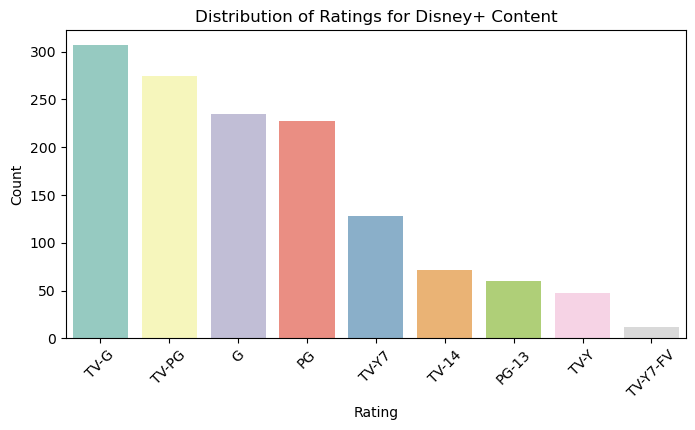

In [313]:
# 1) What is the most common rating for Disney+ content?
most_common_rating = df['rating'].value_counts().idxmax()

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='rating', palette='Set3', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings for Disney+ Content')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


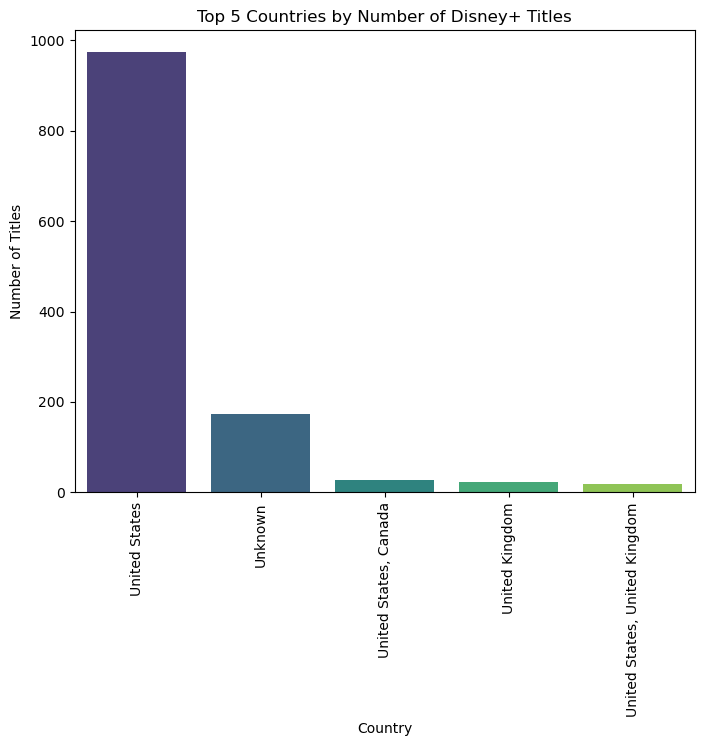

In [314]:
# 2) What are the top 5 countries by the number of Disney+ titles?
# Select the top 5 countries
top_5_countries = country_counts.head(5)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values, palette='viridis')
plt.title('Top 5 Countries by Number of Disney+ Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

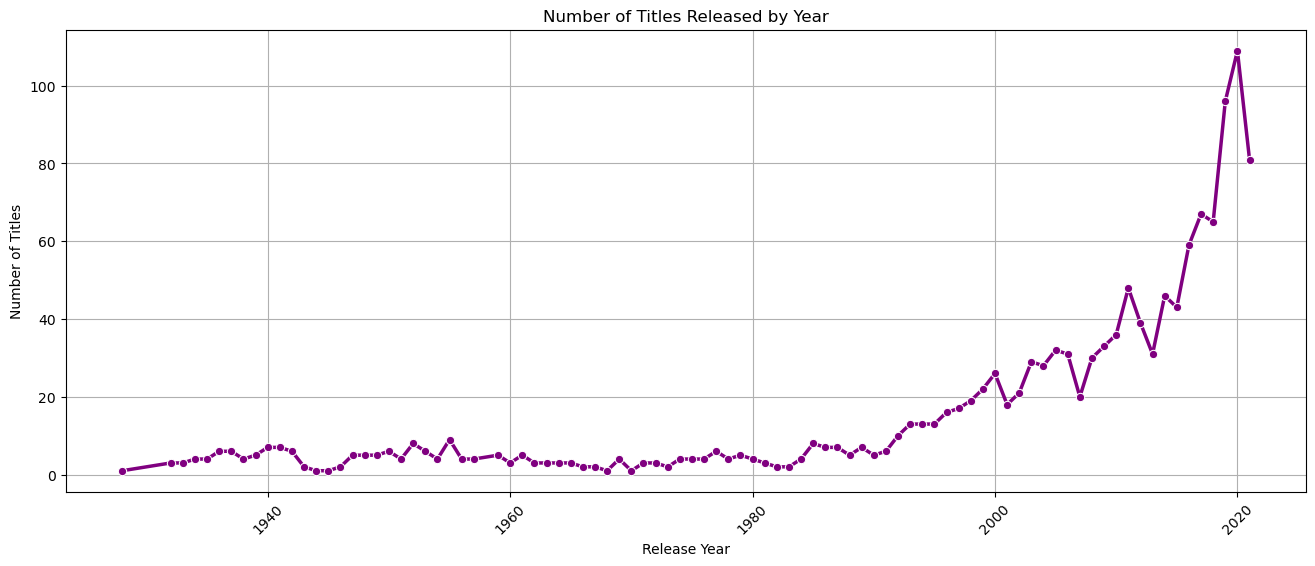

In [315]:
# 3) What are the number of titles released by year?
# Number of titles released by year
content_per_year = df['release_year'].value_counts().sort_index()

# More efficient line plot
plt.figure(figsize=(16, 6))
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker='o', color='purple', linewidth=2.5)
plt.title('Number of Titles Released by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


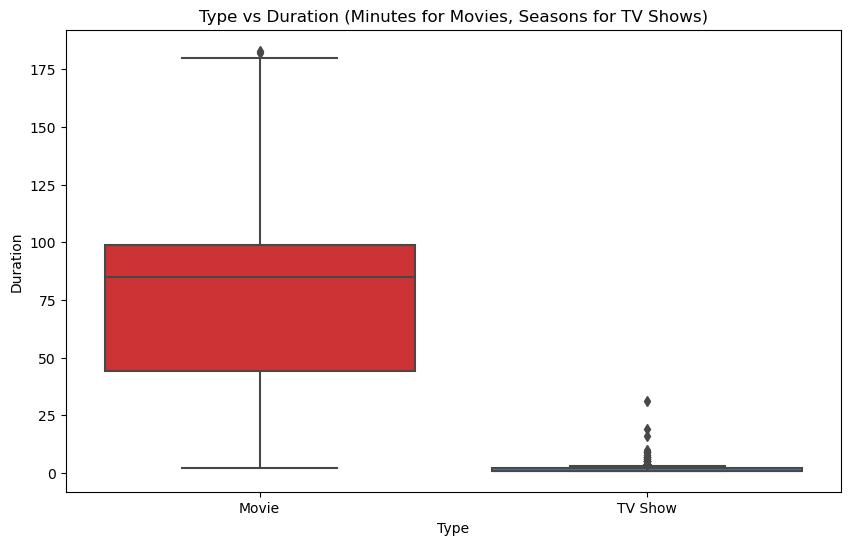

In [316]:
# 4) How is the relationship between type of show and its duration?
# Separate the dataset into movies and TV shows
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()


# For movies, keep the 'duration' as is (numeric, representing minutes)
movies['duration_numeric'] = movies['duration'].str.extract('(\d+)').astype(float)
# For TV shows, extract the number of seasons
tv_shows['duration_numeric'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# Combine the data again
disney_data_combined = pd.concat([movies, tv_shows])

plt.figure(figsize=(10, 6))
sns.boxplot(data=disney_data_combined, x='type', y='duration_numeric', palette='Set1')
plt.title('Type vs Duration (Minutes for Movies, Seasons for TV Shows)')
plt.xlabel('Type')
plt.ylabel('Duration')
plt.show()


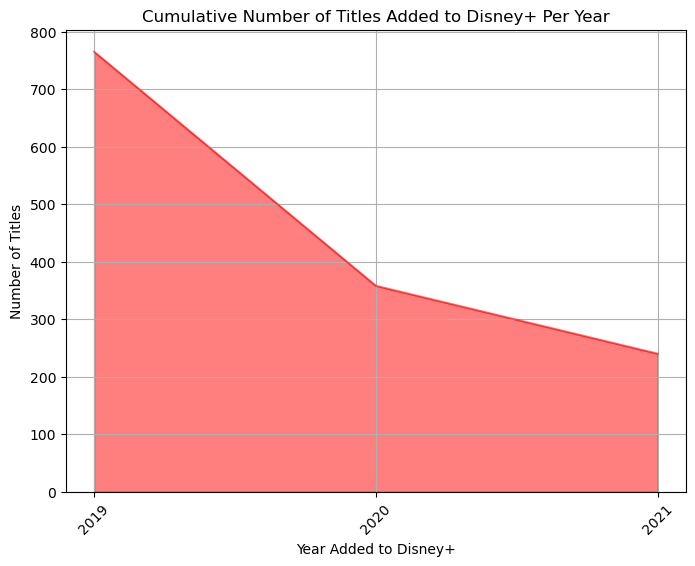

In [317]:
# 5) What are the number of titles added to Disney+ each year?
# Convert 'date_added' to datetime and extract year
df['date_added'] = pd.to_datetime(df['date_added'])
titles_added_per_year = df['date_added'].dt.year.value_counts().sort_index()

# Area-plot
plt.figure(figsize=(8, 6))
titles_added_per_year.plot(kind='area', color='red', alpha=0.5)
plt.title('Cumulative Number of Titles Added to Disney+ Per Year')
plt.xlabel('Year Added to Disney+')
plt.ylabel('Number of Titles')
# Set x-ticks to be integer year
plt.xticks(ticks=titles_added_per_year.index, labels=titles_added_per_year.index.astype(int), rotation=45)
plt.grid()
plt.show()



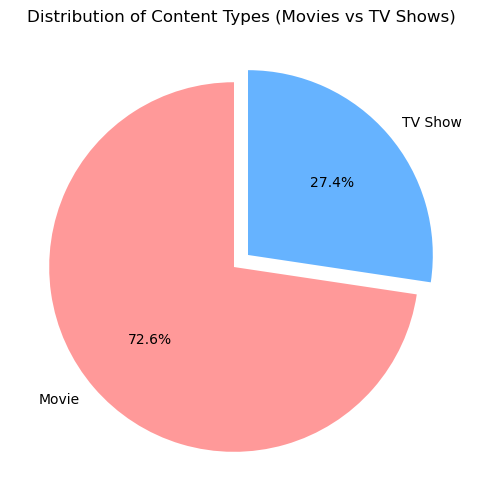

In [318]:
# 6) What is the distribution of content types (Movies vs TV Shows)?
# Count the occurrences of each content type (Movies vs TV Shows)
content_type_counts = df['type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90, explode=(0.05, 0.05))
plt.title('Distribution of Content Types (Movies vs TV Shows)')
plt.show()

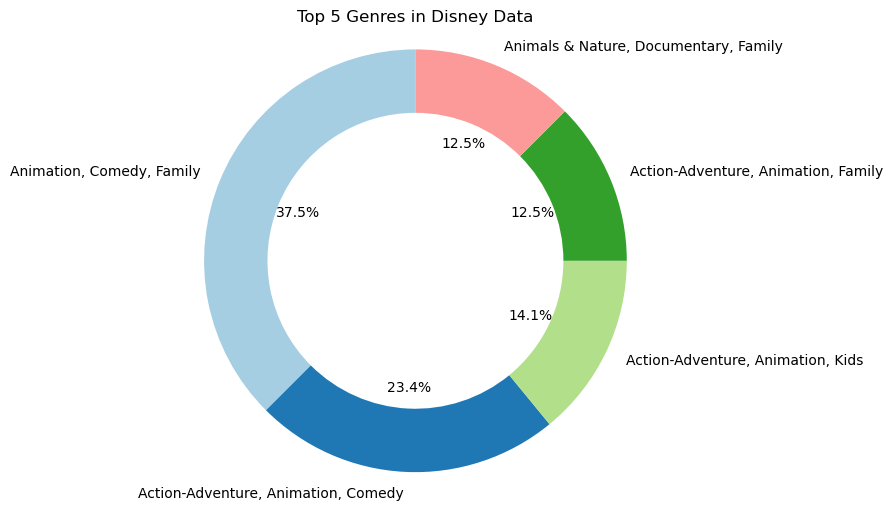

In [319]:
# 7) What are the most common genres (listed_in)?
top_5_genres = df['listed_in'].value_counts().head(5)

# Donut chart
plt.figure(figsize=(6, 6))
plt.pie(top_5_genres, labels=top_5_genres.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, wedgeprops=dict(width=0.3))
plt.title('Top 5 Genres in Disney Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
